# Pandas (5 Points)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file
df = pd.read_csv('GasPrices.csv')

In [3]:
# Calulate and Print the summary statistics
numeric_cols = df.select_dtypes(include='number').columns
summary = df.describe()
print(summary)

       Unnamed: 0          ID       Price       Pumps   Gasolines  \
count  101.000000  101.000000  101.000000  101.000000  101.000000   
mean    51.000000   51.000000    1.864257    6.950495    3.465347   
std     29.300171   29.300171    0.081515    3.925242    0.557931   
min      1.000000    1.000000    1.730000    2.000000    1.000000   
25%     26.000000   26.000000    1.790000    4.000000    3.000000   
50%     51.000000   51.000000    1.850000    6.000000    3.000000   
75%     76.000000   76.000000    1.920000    8.000000    4.000000   
max    101.000000  101.000000    2.090000   24.000000    4.000000   

            Zipcode         Income  
count    101.000000     101.000000  
mean   78730.782178   56727.217822  
std       22.054298   25868.359804  
min    78701.000000   12786.000000  
25%    78704.000000   37690.000000  
50%    78731.000000   52306.000000  
75%    78752.000000   70095.000000  
max    78759.000000  128556.000000  


In [4]:
#  Find the average price, average income, and average number of pumps for each group.
means = df.groupby('Name')[['Price', 'Income', 'Pumps']].mean()
print(means)

                            Price        Income      Pumps
Name                                                      
7-Eleven                 1.887778  53432.333333   4.666667
Around the Corner Store  1.940000  63750.000000   2.000000
Chevron                  1.871818  61754.636364   8.727273
Citgo                    1.835000  49387.000000   4.000000
Conoco                   1.890000  43545.500000   4.000000
Costco                   1.730000  70095.000000  12.000000
Double R Grocery         1.790000  37690.000000   4.000000
East 1st Grocery         1.770000  37690.000000   4.000000
Exxon                    1.855000  52344.333333  11.500000
Gulf                     1.788571  50084.142857   5.714286
HEB Fuel                 1.790000  36903.500000  11.000000
Kool Corner              1.790000  42615.000000   4.000000
Lamar Corner Store       1.890000  37396.000000   2.000000
Major Brand Gas          1.790000  60856.000000   4.000000
Mobil                    1.865000  47460.500000  12.0000

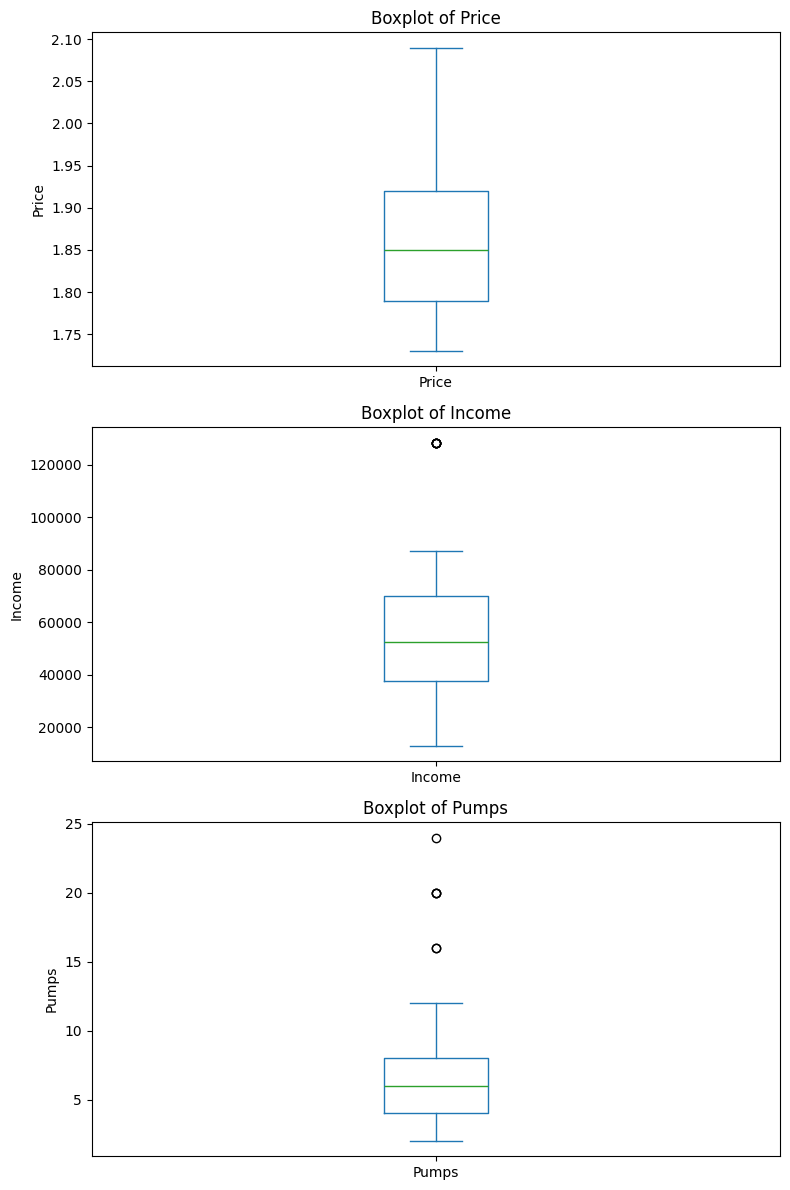

In [5]:
# Create subplots: 3 rows, 1 column
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Boxplot for 'Price'
df['Price'].plot.box(ax=axs[0])
axs[0].set_title('Boxplot of Price')
axs[0].set_ylabel('Price')

# Boxplot for 'Income'
df['Income'].plot.box(ax=axs[1])
axs[1].set_title('Boxplot of Income')
axs[1].set_ylabel('Income')

# Boxplot for 'Pumps'
df['Pumps'].plot.box(ax=axs[2])
axs[2].set_title('Boxplot of Pumps')
axs[2].set_ylabel('Pumps')

# Adjust layout
plt.tight_layout()
plt.show()


# linear regression functions from last ex:

In [6]:
def learn_simple_linreg(x, y):
    """this function learns the parameters of a simple linear regression model
    given the data x and y."""
    x = x.flatten() 
    y = y.flatten()
    
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    numerator = np.sum((x - x_bar) * (y - y_bar))
    denominator = np.sum((x - x_bar) ** 2)
    
    beta_1 = numerator / denominator
    beta_0 = y_bar - beta_1 * x_bar
    
    return beta_0, beta_1
### Q2 dot 3 ####

def predict_simple_linreg(x, beta_0, beta_1):
    """this function predicts the output of a simple linear regression model
    given the input x and the learned parameters beta_0 and beta_1."""
    return beta_0 + beta_1 * x


In [7]:
#learn the LR model on the given original data
x_orig = df['Income'].values
y = df['Price'].values

beta_0_orig, beta_1_orig = learn_simple_linreg(x_orig, y)
y_pred_orig = predict_simple_linreg(x_orig, beta_0_orig, beta_1_orig)

In [8]:
# The normailized model: 
x_norm = (x_orig - np.mean(x_orig)) / np.std(x_orig)
beta_0_norm, beta_1_norm = learn_simple_linreg(x_norm, y)
y_pred_norm = predict_simple_linreg(x_norm, beta_0_norm, beta_1_norm)

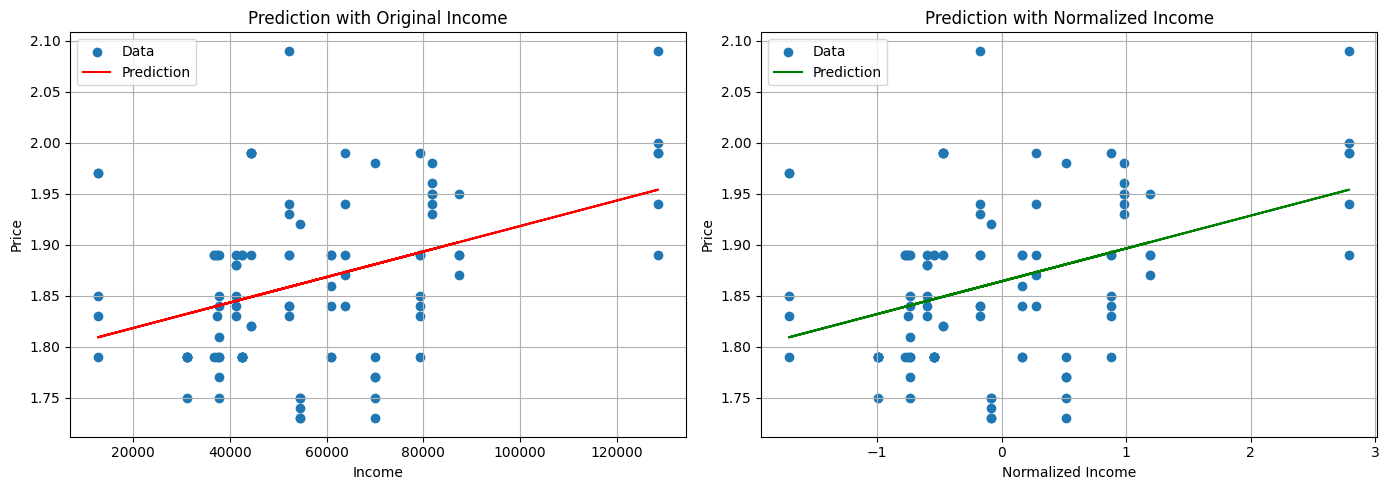

In [9]:
#plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot with original Income
axs[0].scatter(x_orig, y, label='Data')
axs[0].plot(x_orig, y_pred_orig, color='red', label='Prediction')
axs[0].set_title('Prediction with Original Income')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Price')
axs[0].legend()
axs[0].grid(True)

# Plot with normalized Income
axs[1].scatter(x_norm, y, label='Data')
axs[1].plot(x_norm, y_pred_norm, color='green', label='Prediction')
axs[1].set_title('Prediction with Normalized Income')
axs[1].set_xlabel('Normalized Income')
axs[1].set_ylabel('Price')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


## conculsion: 


#### Normalization changes the scale of the Income feature but does not affect the shape of the prediction line or the predicted values. Both models yield the same predictions because linear regression is scale-invariant in terms of model fit. However, normalization changes the slope and intercept, shifting the interpretation of coefficients to standard units (e.g., "per standard deviation" instead of "per dollar"). This improves model interpretability and often enhances numerical stability during training, especially when combining features with very different ranges.

# Linear Regression via Normal Equations (5 Points)


In [10]:
def learn_linreg_normeq(X, y):
    """
    Parameters:
        X (numpy.ndarray): Feature matrix of shape (N, d)
        y (numpy.ndarray): Target vector of shape (N,)
   """
    # Step 1: Compute A = X^T X
    A = X.T @ X

    # Step 2: Compute b = X^T y
    b = X.T @ y

    # Step 3: Solve the system A * beta = b
    beta_hat = np.linalg.solve(A, b)

    return beta_hat


In [11]:
#Reuse the Gasprices.csv dataset. Load it as Xdata
Xdata = pd.read_csv('GasPrices.csv')
print(Xdata.columns)
print(Xdata.dtypes)


Index(['Unnamed: 0', 'ID', 'Name', 'Price', 'Pumps', 'Interior', 'Restaurant',
       'CarWash', 'Highway', 'Intersection', 'Stoplight',
       'IntersectionStoplight', 'Gasolines', 'Competitors', 'Zipcode',
       'Address', 'Income', 'Brand'],
      dtype='object')
Unnamed: 0                 int64
ID                         int64
Name                      object
Price                    float64
Pumps                      int64
Interior                  object
Restaurant                object
CarWash                   object
Highway                   object
Intersection              object
Stoplight                 object
IntersectionStoplight     object
Gasolines                  int64
Competitors               object
Zipcode                    int64
Address                   object
Income                     int64
Brand                     object
dtype: object


In [12]:

# Step 1: Extract y and drop it from X
y = df['Price']
Xdata = df.drop(columns=['Price', 'Name', 'ID', 'Zipcode', 'Address', 'Competitors', 'Brand', 'IntersectionStoplight'])

# Step 2: Convert 'Y'/'N' columns to binary
binary_cols = [
    'Interior', 'Restaurant', 'CarWash', 'Highway', 
    'Intersection', 'Stoplight'
]
for col in binary_cols:
    Xdata[col] = Xdata[col].map({'Y': 1, 'N': 0})

# Step 3: Drop rows with NaNs in either X or y
combined = pd.concat([Xdata, y], axis=1)
combined = combined.dropna()
Xdata = combined.drop(columns=['Price'])
y = combined['Price']


### Exaplaination for edit:
To prepare the dataset for training, I first extracted the target variable Price into y, and dropped it from the features. Then, I removed irrelevant or non-numeric columns — specifically Name, ID, Zipcode, Address, Competitors, Brand, and IntersectionStoplight — because they were either identifiers, difficult to encode, or contained too many missing values. Next, I converted binary categorical columns (Interior, Restaurant, CarWash, Highway, Intersection, and Stoplight) from 'Y'/'N' to 1/0 for numeric compatibility. Finally, I concatenated Xdata and y, dropped any rows containing missing values in either, and re-separated them to ensure everything was clean and aligned for training.

In [13]:
print(Xdata.dtypes)


Unnamed: 0      int64
Pumps           int64
Interior        int64
Restaurant      int64
CarWash         int64
Highway         int64
Intersection    int64
Stoplight       int64
Gasolines       int64
Income          int64
dtype: object


In [15]:
"""• Split your dataset Xdata, Ydata into Xtrain, Ytrain, and Xtest, Ytest (randomly assign 80%
to Xtrain, Ytrain and the remaining 20% to Xtest, ytest)."""

# Set random seed for reproducibility
np.random.seed(42)

# Total number of rows
N = len(Xdata)

# Create a random permutation of indices
indices = np.random.permutation(N)

# Calculate split index (80%)
split_idx = int(N * 0.8)

# Split indices
train_idx = indices[:split_idx]
test_idx = indices[split_idx:]

# Apply the split
Xtrain = Xdata.iloc[train_idx]
Xtest = Xdata.iloc[test_idx]
Ytrain = y[train_idx]
Ytest = y[test_idx]


In [16]:
print("Xtrain shape:", Xtrain.shape)
print("Ytrain shape:", Ytrain.shape)
print("Xtest shape:", Xtest.shape)
print("Ytest shape:", Ytest.shape)
print(f"We had {N} rows in total, and now we have Xtrain + Xtest = {len(Xtrain) + len(Xtest)} ")


Xtrain shape: (80, 10)
Ytrain shape: (80,)
Xtest shape: (21, 10)
Ytest shape: (21,)
We had 101 rows in total, and now we have Xtrain + Xtest = 101 


In [17]:
print(Xdata.isna().sum())


Unnamed: 0      0
Pumps           0
Interior        0
Restaurant      0
CarWash         0
Highway         0
Intersection    0
Stoplight       0
Gasolines       0
Income          0
dtype: int64


In [18]:
"""
• Implement the learn-linreg-NormEq algorithm and learn a parameter vector β using the Xtrain
set. You need to learn a model to predict the sales price of gas, i.e., ytest.

"""
# Step 1: Add bias column (column of 1s) to Xtrain and Xtest
Xtrain_np = np.hstack((np.ones((Xtrain.shape[0], 1)), Xtrain.to_numpy()))
Xtest_np = np.hstack((np.ones((Xtest.shape[0], 1)), Xtest.to_numpy()))

# Step 2: Implement the Normal Equation solver
def learn_linreg_normeq(X, y):
    A = X.T @ X         # X^T X
    b = X.T @ y         # X^T y
    beta = np.linalg.solve(A, b)  # Solve Aβ = b
    return beta

# Step 3: Learn parameters from training data
beta = learn_linreg_normeq(Xtrain_np, Ytrain)
print("Learned β:", beta)

# Step 4: Predict gas prices for Xtest
Ypred = Xtest_np @ beta


Learned β: [ 1.87289548e+00  2.45019936e-04 -4.98783788e-03 -2.70563854e-02
 -2.54242420e-03 -2.01870397e-02  5.26983931e-02 -8.33361235e-02
  1.05431625e-02  1.58228439e-02  7.83794005e-07]


In [ ]:
"""
Line 6 of the learn-linreg-NormEq algorithm uses SOLVE-SLE. You must replace SOLVE-SLE With the following options (implement this yourself):
The following 3 next cells includes the learn-linreg-NormEq with the 3 diffrent methods to compute Ax = b
– Gaussian elimination
– Cholesky decomposition
– QR decomposition"


"""

In [24]:
def gaussian_elimination(A, b):
    """
    Solves A * x = b using Gaussian Elimination.
    A must be a square matrix. Returns x.
    """
    A = A.astype(float).copy()
    b = b.astype(float).copy()
    n = len(b)

    # Forward elimination
    for i in range(n):
        # Make sure the pivot is not zero (swap rows if needed)
        if A[i, i] == 0:
            for j in range(i+1, n):
                if A[j, i] != 0:
                    A[[i, j]] = A[[j, i]]
                    b[[i, j]] = b[[j, i]]
                    break
        
        # Eliminate entries below the pivot
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j] = A[j] - factor * A[i]
            b[j] = b[j] - factor * b[i]

    # Back substitution
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    return x

# Updated learn_linreg_normeq using Gaussian Elimination
def learn_linreg_normeq_1.1(X, y):
    A = X.T @ X
    b = X.T @ y
    beta = gaussian_elimination(A, b)
    return beta

In [25]:



def cholesky_decomposition(A):
    """
    Returns lower triangular matrix L such that A = L @ L.T
    """
    n = A.shape[0]
    L = np.zeros_like(A)

    for i in range(n):
        for j in range(i + 1):
            sum_k = np.dot(L[i, :j], L[j, :j])

            if i == j:
                L[i, j] = np.sqrt(A[i, i] - sum_k)
            else:
                L[i, j] = (A[i, j] - sum_k) / L[j, j]

    return L

def forward_substitution(L, b):
    n = L.shape[0]
    z = np.zeros(n)
    for i in range(n):
        z[i] = (b[i] - np.dot(L[i, :i], z[:i])) / L[i, i]
    return z

def backward_substitution(U, z):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (z[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

def learn_linreg_normeq_1dot2(X, y):
    A = X.T @ X
    b = X.T @ y

    L = cholesky_decomposition(A)
    z = forward_substitution(L, b)
    beta = backward_substitution(L.T, z)

    return beta



In [26]:
#QR Decompositon
def back_substitution(R, z):
    n = R.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (z[i] - np.dot(R[i, i+1:], x[i+1:])) / R[i, i]
    return x

def learn_linreg_normeq_1dot3(X, y):
    # QR decomposition
    Q, R = np.linalg.qr(X)

    # Compute Qᵀ * y
    Qt_y = Q.T @ y

    # Solve R * beta = Qᵀ * y using back-substitution
    beta = back_substitution(R, Qt_y)

    return beta




In [28]:
"""• Perform predictions ˆy on the test dataset Xtest using the parameters learned in steps 5 and 6.
[Hint: You will have three different prediction models based on the replacement function from step
6.]"""


# Predictions using all 3 beta vectors
#for gauss
beta_gauss = learn_linreg_normeq_1dot1(Xtrain_np, Ytrain)
Ypred_gauss = Xtest_np @ beta_gauss

#for Choelsky
beta_chol = learn_linreg_normeq_1dot2(Xtrain_np, Ytrain)
Ypred_chol = Xtest_np @ beta_chol

#for QR

beta_qr = learn_linreg_normeq_1dot3(Xtrain_np, Ytrain)
Ypred_qr = Xtest_np @ beta_qr



In [29]:
Ypred_gauss

array([1.85241992, 1.88684271, 1.88742474, 1.92630639, 1.8413153 ,
       1.80053178, 1.84840939, 1.84134212, 1.83365261, 1.8246643 ,
       1.89082924, 1.89267237, 1.86874734, 1.87127943, 1.92797428,
       1.84844589, 1.85907959, 1.86250662, 1.82380413, 1.99093525,
       1.90086277])

In [30]:
Ypred_chol

array([1.85241992, 1.88684271, 1.88742474, 1.92630639, 1.8413153 ,
       1.80053178, 1.84840939, 1.84134212, 1.83365261, 1.8246643 ,
       1.89082924, 1.89267237, 1.86874734, 1.87127943, 1.92797428,
       1.84844589, 1.85907959, 1.86250662, 1.82380413, 1.99093525,
       1.90086277])

In [31]:
Ypred_qr

array([1.85241992, 1.88684271, 1.88742474, 1.92630639, 1.8413153 ,
       1.80053178, 1.84840939, 1.84134212, 1.83365261, 1.8246643 ,
       1.89082924, 1.89267237, 1.86874734, 1.87127943, 1.92797428,
       1.84844589, 1.85907959, 1.86250662, 1.82380413, 1.99093525,
       1.90086277])

# Model Assesment
"The final step is to find how close these three models are to the original values.
– Plot the residual ε = |ytest − yˆ| versus the true value of ytest for each model.
– Find the average residual ε = |ytest − yˆ| for each model.
1
– Compute the root-mean-square error (RMSE) as follows:
RMSE = sPN
n=1(ytest(n) − yˆ(n))2
"

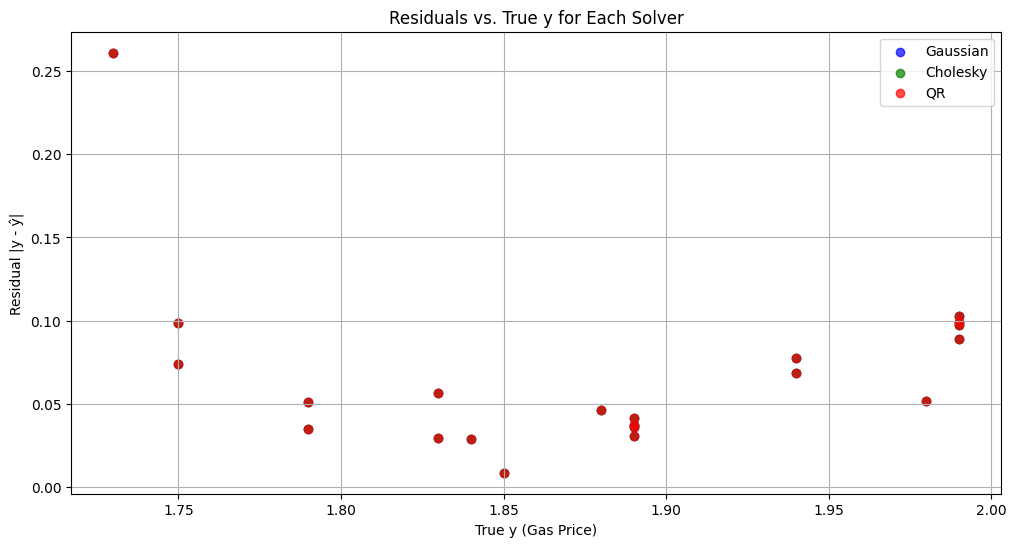

In [33]:
import matplotlib.pyplot as plt

# Compute residuals
residuals_gauss = np.abs(Ytest - Ypred_gauss)
residuals_chol = np.abs(Ytest - Ypred_chol)
residuals_qr    = np.abs(Ytest - Ypred_qr)

# Plot
plt.figure(figsize=(12, 6))

plt.scatter(Ytest, residuals_gauss, label='Gaussian', alpha=0.7, color='blue')
plt.scatter(Ytest, residuals_chol, label='Cholesky', alpha=0.7, color='green')
plt.scatter(Ytest, residuals_qr,    label='QR',       alpha=0.7, color='red')

plt.xlabel('True y (Gas Price)')
plt.ylabel('Residual |y - ŷ|')
plt.title('Residuals vs. True y for Each Solver')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# Average residual (Mean Absolute Error) for each model
avg_residual_gauss = np.mean(np.abs(Ytest - Ypred_gauss))
avg_residual_chol  = np.mean(np.abs(Ytest - Ypred_chol))
avg_residual_qr    = np.mean(np.abs(Ytest - Ypred_qr))

print("Average Residual (Gaussian):", avg_residual_gauss)
print("Average Residual (Cholesky):", avg_residual_chol)
print("Average Residual (QR):      ", avg_residual_qr)


#Same Results as expected (will explain why later in "Conclusion")

Average Residual (Gaussian): 0.06771792549396113
Average Residual (Cholesky): 0.06771792549396081
Average Residual (QR):       0.0677179254939614


In [37]:
# RMSE for each model
rmse_gauss = np.sqrt(np.mean((Ytest - Ypred_gauss)**2))
rmse_chol  = np.sqrt(np.mean((Ytest - Ypred_chol)**2))
rmse_qr    = np.sqrt(np.mean((Ytest - Ypred_qr)**2))

print("RMSE (Gaussian):", rmse_gauss)
print("RMSE (Cholesky):", rmse_chol)
print("RMSE (QR):      ", rmse_qr)
#Same Results as expected (will explain why later in "Conclusion")

RMSE (Gaussian): 0.08475032143615086
RMSE (Cholesky): 0.08475032143614969
RMSE (QR):       0.0847503214361504


## Conculsion 

All three methods — Gaussian Elimination, Cholesky Decomposition, and QR Decomposition — produced the same predictions because they all solve the **same normal equation**.
Each method is just a different numerical approach to solving this system, but they all lead to the same optimal β 


In the residual plot, we observe that the **largest residuals tend to occur at the edges of the ytest range**, especially when the **true gas prices are very low**. This suggests the model struggles more with accurately predicting prices at the extremes — a common issue in linear regression when the data distribution is uneven or sparse near the edges.

Additionally, we notice **multiple residual points aligned vertically for the same ytest value**. This indicates that while the true price is identical across those examples, the **input features must differ**, causing the linear model to produce **different predictions**. Since a linear model is a function of the input features, not the output label, it's expected for identical target values to result in different predictions — depending on the associated feature values.


All three models — Gaussian Elimination, Cholesky Decomposition, and QR Decomposition — produced nearly identical RMSE and average residual values, confirming that they are solving the same underlying linear regression problem accurately and consistently. The low error values (RMSE ≈ 0.0848, MAE ≈ 0.0677) indicate that the model fits the data well, and that all three numerical methods are reliable for this dataset.
